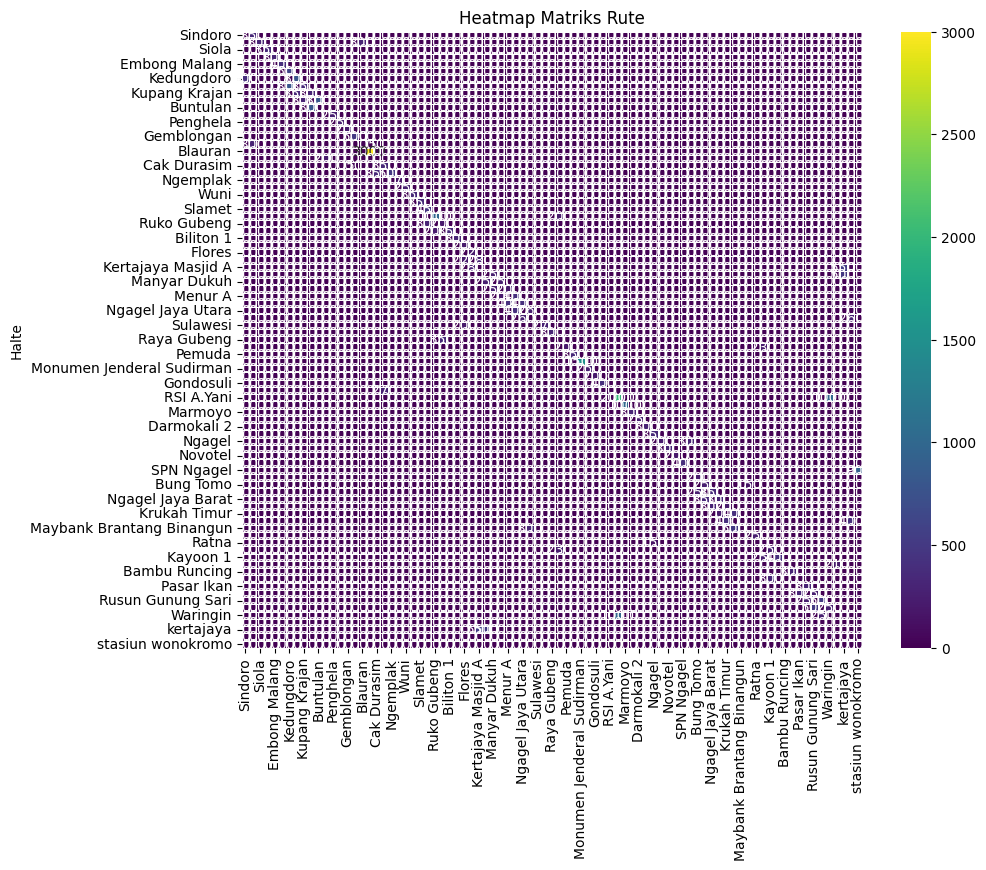

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV dan mengonversi nilai-nilai menjadi int
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='viridis', fmt='d', linewidths=.5)
plt.title('Heatmap Matriks Rute')
plt.show()


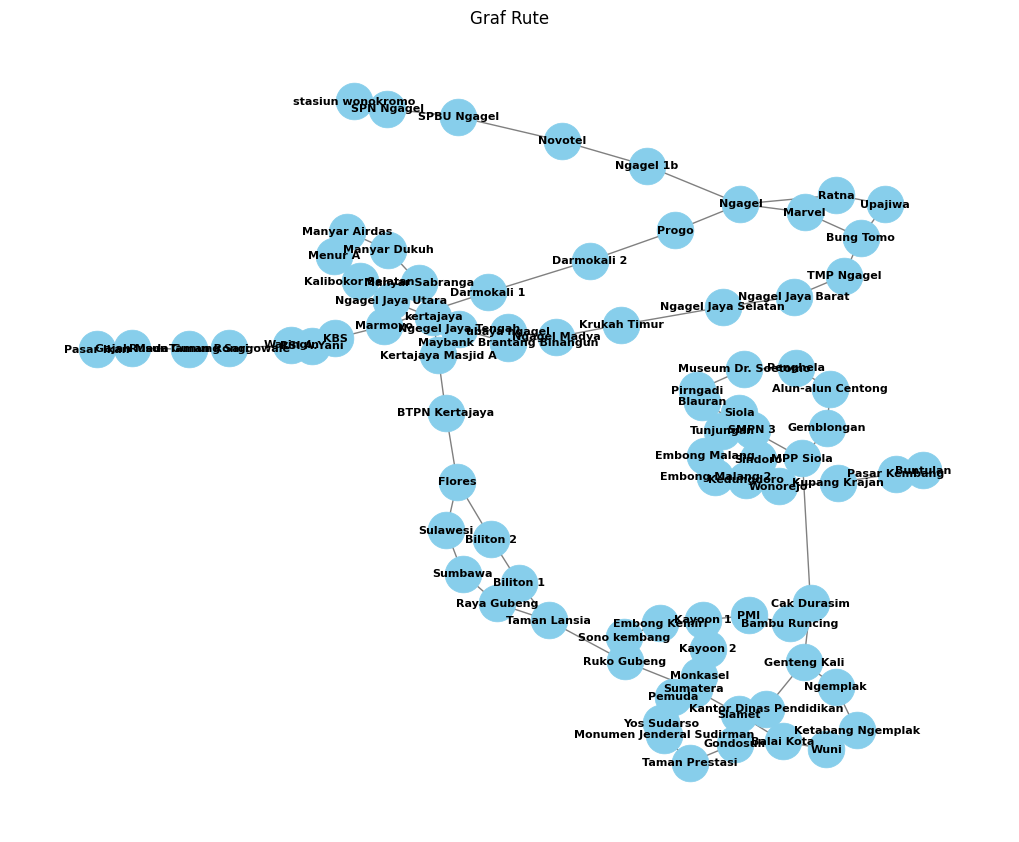

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Membaca data dari file CSV dan mengonversi nilai-nilai menjadi int
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = nx.from_pandas_adjacency(df)

# Membuat plot graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)  # Menentukan posisi simpul
nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.title('Graf Rute')
plt.show()


In [3]:
import pandas as pd

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def dijkstra(graph, start, end):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = set(graph)
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node

    # Mendapatkan jalur dari simpul awal ke simpul tujuan
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan Dijkstra untuk mencari jalur dan jarak terpendek, bisa diganti sesuai tujuan
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = dijkstra(graph, start_node, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


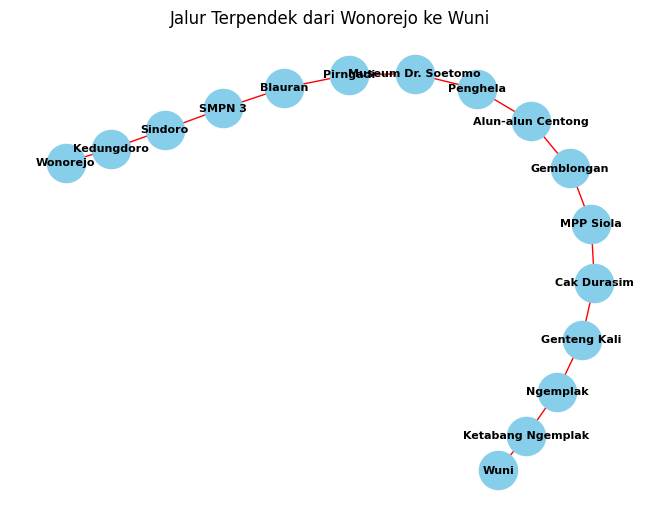

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def dijkstra(graph, start, end):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = set(graph)
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node

    # Mendapatkan jalur dari simpul awal ke simpul tujuan
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan Dijkstra untuk mencari jalur dan jarak terpendek, bisa diganti sesuai tujuan
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = dijkstra(graph, start_node, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")

# Plot hanya jalur yang dilewati
G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)

plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


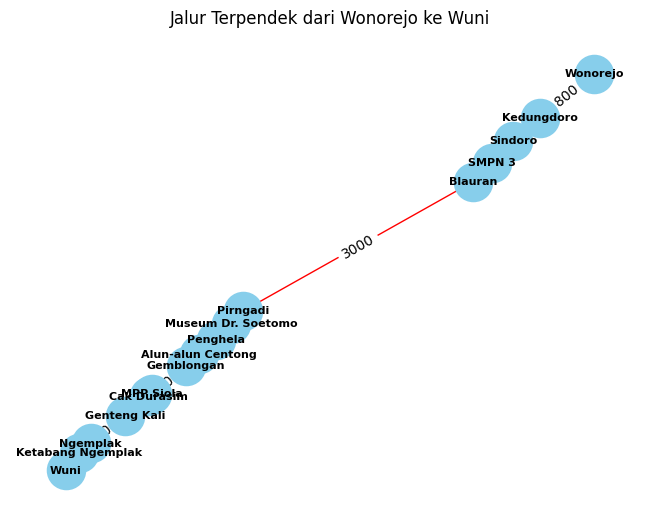

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def dijkstra(graph, start, end):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = set(graph)
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node

    # Mendapatkan jalur dari simpul awal ke simpul tujuan
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan Dijkstra untuk mencari jalur dan jarak terpendek, bisa diganti sesuai tujuan
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = dijkstra(graph, start_node, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")

# Plot hanya jalur yang dilewati
G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])

# Gunakan kamada_kawai_layout untuk hasil yang lebih baik
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)

# Tambahkan label pada edge
edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


In [6]:
# Definisikan data rute bus dengan menambahkan nilai NaN untuk menyamakan panjang kolom
bus_routes_data = {
    'FD01': ['Sindoro', 'SMPN 3', 'Siola', 'Tunjungan', 'Embong Malang', 'Embong Malang 2', 'Kedungdoro', 'Wonorejo', 'Kupang Krajan', 'Pasar Kembang', 'Buntulan'],
    'FD07': [
        'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'SMPN 3',
        'Blauran', 'Pirngadi', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni',
        'Balai Kota', 'Slamet', 'Sumatera', 'Ruko Gubeng', 'Taman Lansia', 'Biliton 1', 'Biliton 2',
        'BTPN Kertajaya', 'Kertjaya Masjid A', 'Kertajaya', 'Manyar Sabranga', 'Manyar Dukuh',
        'Manyar Airdas', 'Menur A', 'Kalibokor Selatan', 'Ngagel Jaya Utara', 'Ngagel Jaya Tengah',
        'Maybank Brantang Binangun', 'Sulawesi', 'Flores', 'Sumbawa', 'Raya Gubeng', 'Monkasel',
        'Pemuda', 'Yos Sudarso', 'Monumen Jenderal Sudirman', 'Taman Prestasi', 'Gondosuli',
        'Kantor Dinas Pendidikan', 'RSI A.yani', 'KBS', 'Marmoyo', 'Darmokali 1', 'Darmokali 2',
        'Progo', 'Ngagel', 'Ngagel 1b', 'Novotel', 'SPBU Ngagel', 'SPN Ngagel', 'Marvel', 'Bung Tomo',
        'TMP Ngagel', 'Ngagel Jaya Barat', 'Ngagel Jaya Selatan', 'Krukah Timur', 'Ngagel Madya',
        'Upajiwa', 'Ratna', 'Ubaya Ngagel', 'Stasiun Wonokromo'],
    'FD03': ['RSI A.yani', 'KBS', 'Marmoyo', 'Darmokali 1', 'Darmokali 2', 'Progo', 'Ngagel', 'Ngagel 1b', 'Novotel', 'SPBU Ngagel', 'SPN Ngagel', 'Marvel', 'Bung Tomo', 'TMP Ngagel', 'Ngagel Jaya Barat', 'Ngagel Jaya Selatan', 'Krukah Timur', 'Ngagel Madya', 'Maybank Brantang Binangun', 'Upajiwa', 'Ratna', 'Stasiun Wonokromo', 'Ubaya Ngagel'],
    'FD02': ['Monkasel', 'Kayoon 2', 'Kayoon 1', 'Embong Kemiri', 'Bambu Runcing', 'PMI', 'Sono Kembang'],
    'FD06': ['Pasar Ikan', 'Gajah Mada', 'Rusun Gunung Sari', 'Taman Ronggowale', 'Waringin', 'RSI A.yani', 'KBS']
}

Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Kode bus dari Wonorejo ke Kedungdoro: ['FD01']
Kode bus dari Kedungdoro ke Sindoro: ['FD01']
Kode bus dari Sindoro ke SMPN 3: ['FD01']
Kode bus dari SMPN 3 ke Blauran: ['FD07']
Kode bus dari Blauran ke Pirngadi: ['FD07']
Kode bus dari Pirngadi ke Museum Dr. Soetomo: ['FD07']
Kode bus dari Museum Dr. Soetomo ke Penghela: ['FD07']
Kode bus dari Penghela ke Alun-alun Centong: ['FD07']
Kode bus dari Alun-alun Centong ke Gemblongan: ['FD07']
Kode bus dari Gemblongan ke MPP Siola: ['FD07']
Kode bus dari MPP Siola ke Cak Durasim: ['FD07']
Kode bus dari Cak Durasim ke Genteng Kali: ['FD07']
Kode bus dari Genteng Kali ke Ngemplak: ['FD07']
Kode bus dari Ngemplak ke Ketabang Ngemplak: ['FD07']
Kode bus dari Ketaban

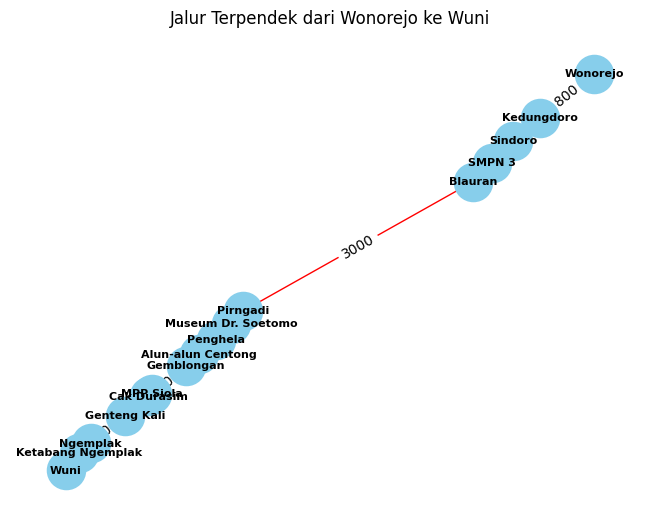

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def dijkstra(graph, start, end, bus_routes_df):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = set(graph)
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node

    # Check if there is a valid path from start to end
    if distances[end] == float('infinity'):
        return None, None

    # Reconstruct the path from end to start
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()
    
    kode_bus = []
    for column in bus_routes_df.columns:
        if halte_name in bus_routes_df[column].str.lower().values:
            kode_bus.append(column)

    return kode_bus

def find_combined_bus_code(bus_routes_df, start_node, end_node):
    start_kode_bus = find_bus_code(bus_routes_df, start_node)
    end_kode_bus = find_bus_code(bus_routes_df, end_node)

    combined_kode_bus = list(set(start_kode_bus) & set(end_kode_bus))
    return combined_kode_bus

def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None

    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code

    if current_code is not None:
        simplified_codes.append(current_code)

    return simplified_codes

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

#mencari kode bus yang dinaiki
max_len = max(map(len, bus_routes_data.values()))

bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})

# Contoh penggunaan Dijkstra untuk mencari jalur dan jarak terpendek, bisa diganti sesuai tujuan
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = dijkstra(graph, start_node, end_node, bus_routes_df)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")

# Print kode bus untuk setiap segmen jalur
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]

    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    simplified_codes = simplify_bus_codes(combined_kode_bus)
    print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")

# Print kode bus yang melewati seluruh jalur terpendek
full_route_bus_codes = []
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]

    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    full_route_bus_codes.extend(combined_kode_bus)

# Simplifikasi kode bus yang melewati seluruh jalur terpendek
simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")

# Plot hanya jalur yang dilewati
G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])

# Gunakan kamada_kawai_layout untuk hasil yang lebih baik
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)

# Tambahkan label pada edge
edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


In [8]:
import pandas as pd
import time
import matplotlib.pyplot as plt

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def dijkstra(graph, start, end):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = set(graph)
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node

    # Mendapatkan jalur dari simpul awal ke simpul tujuan
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path

def measure_execution_time():
    start_time = time.time()

    # Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
    csv_file = 'datarute.csv'
    df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

    # Membuat graf dari data frame
    graph = create_graph(df)

    # Contoh penggunaan Dijkstra untuk mencari jalur dan jarak terpendek, bisa diganti sesuai tujuan
    start_node = 'Wonorejo'
    end_node = 'Wuni'
    distance, shortest_path = dijkstra(graph, start_node, end_node)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
    print(f"Jalur terpendek: {shortest_path}")
    print(f"Waktu eksekusi: {execution_time} detik")

# Mengukur waktu eksekusi dan menampilkan hasilnya
measure_execution_time()


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Waktu eksekusi: 0.019761085510253906 detik


BELLMAN FORD

Algoritma Bellman-Ford adalah algoritma pencarian jarak terpendek yang dapat digunakan untuk graf dengan bobot edge negatif, tetapi mungkin memakan waktu lebih lama daripada algoritma Dijkstra. 
Algoritma Bellman-Ford memiliki kompleksitas waktu O(V * E), di mana V adalah jumlah simpul dan E adalah jumlah edge dalam graf. 

In [9]:
import pandas as pd

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def bellman_ford(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    nodes = list(graph.keys())
    edges = [(u, v) for u in nodes for v in graph[u]]

    for _ in range(len(nodes) - 1):
        for u, v in edges:
            if distances[u] + graph[u][v] < distances[v]:
                distances[v] = distances[u] + graph[u][v]
                previous_nodes[v] = u

    # Deteksi siklus negatif
    for u, v in edges:
        if distances[u] + graph[u][v] < distances[v]:
            raise ValueError("Graf berisi siklus negatif")

    return distances, previous_nodes

def get_shortest_path(previous_nodes, end):
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return path

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan Bellman-Ford untuk mencari jalur dan jarak terpendek
start_node = 'Wonorejo'
distance, previous_nodes = bellman_ford(graph, start_node)

end_node = 'Wuni'
shortest_path = get_shortest_path(previous_nodes, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance[end_node]}")
print(f"Jalur terpendek: {shortest_path}")


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Sindoro -> SMPN 3: weight=350, path=X
SMPN 3 -> Siola: weight=300, path=
SMPN 3 -> Blauran: weight=300, path=X
Siola -> Tunjungan: weight=350, path=
Tunjungan -> Embong Malang: weight=300, path=
Embong Malang -> Embong Malang 2: weight=400, path=
Embong Malang 2 -> Kedungdoro: weight=600, path=
Kedungdoro -> Sindoro: weight=400, path=X
Kedungdoro -> Wonorejo: weight=800, path=
Wonorejo -> Kedungdoro: weight=800, path=X
Wonorejo -> Kupang Krajan: weight=350, path=
Kupang Krajan -> Wonorejo: weight=350, path=
Kupang Krajan -> Pasar Kembang: weight=300, path=
Pasar Kembang -> Kupang Krajan: weight=300, path=
Pasar Kembang -> Buntulan: weight=800, path=
Buntulan -> Pasar Kembang: weight=800, path=
Museum Dr. 

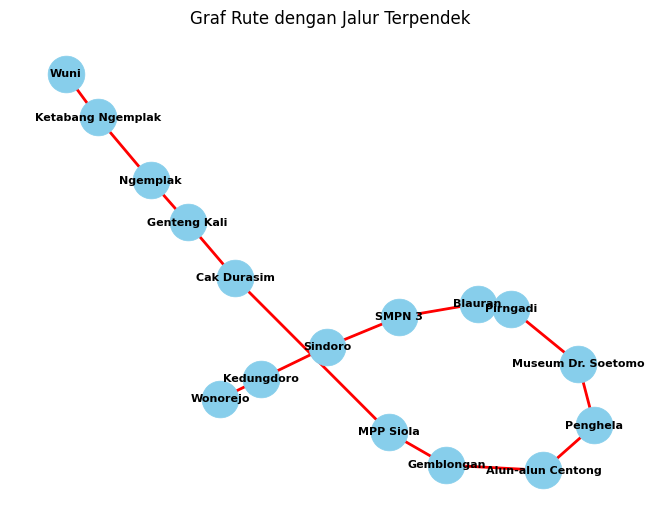

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def bellman_ford(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    nodes = list(graph.keys())
    edges = [(u, v) for u in nodes for v in graph[u]]

    for _ in range(len(nodes) - 1):
        for u, v in edges:
            if distances[u] + graph[u][v] < distances[v]:
                distances[v] = distances[u] + graph[u][v]
                previous_nodes[v] = u

    # Deteksi siklus negatif
    for u, v in edges:
        if distances[u] + graph[u][v] < distances[v]:
            raise ValueError("Graf berisi siklus negatif")

    return distances, previous_nodes

def get_shortest_path(previous_nodes, end):
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return path

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan Bellman-Ford untuk mencari jalur dan jarak terpendek
start_node = 'Wonorejo'
distance, previous_nodes = bellman_ford(graph, start_node)

end_node = 'Wuni'
shortest_path = get_shortest_path(previous_nodes, end_node)


print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance[end_node]}")
print(f"Jalur terpendek: {shortest_path}")

# Membuat graf dari data frame
graph = create_graph(df)

# Menampilkan jalur yang dilalui
G = {node: {} for node in graph}
for u, neighbors in graph.items():
    for v, weight in neighbors.items():
        G[u][v] = {'weight': weight, 'path': []}

for u, v in zip(shortest_path, shortest_path[1:]):
    G[u][v]['path'].append('X')

# Menampilkan informasi jalur pada setiap edge
for u, neighbors in G.items():
    for v, data in neighbors.items():
        weight = data['weight']
        path = ''.join(data['path'])
        print(f"{u} -> {v}: weight={weight}, path={path}")
        
# Menampilkan jalur yang dilalui
G = nx.Graph()
for u, v, weight in [(shortest_path[i], shortest_path[i+1], graph[shortest_path[i]][shortest_path[i+1]]) for i in range(len(shortest_path)-1)]:
    G.add_edge(u, v, weight=weight)
 
# Plot hanya jalur yang dilewati
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in G.edges()], edge_color='red', width=2)

plt.title('Graf Rute dengan Jalur Terpendek')
plt.show()


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


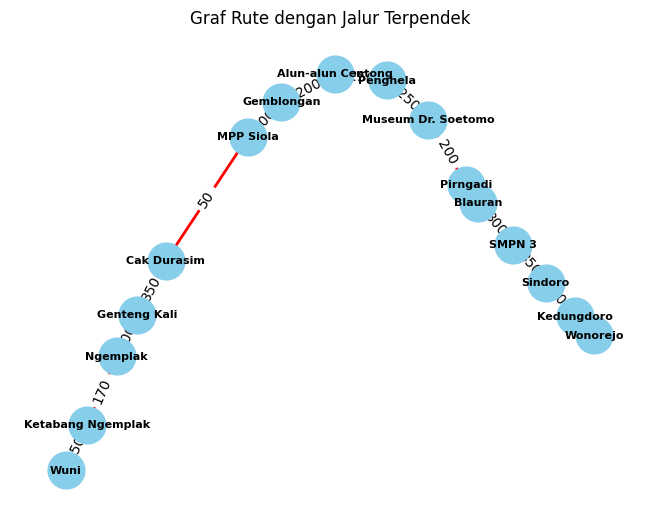

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def bellman_ford(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    nodes = list(graph.keys())
    edges = [(u, v) for u in nodes for v in graph[u]]

    for _ in range(len(nodes) - 1):
        for u, v in edges:
            if distances[u] + graph[u][v] < distances[v]:
                distances[v] = distances[u] + graph[u][v]
                previous_nodes[v] = u

    # Deteksi siklus negatif
    for u, v in edges:
        if distances[u] + graph[u][v] < distances[v]:
            raise ValueError("Graf berisi siklus negatif")

    return distances, previous_nodes

def get_shortest_path(previous_nodes, end):
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return path

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan Bellman-Ford untuk mencari jalur dan jarak terpendek
start_node = 'Wonorejo'
distance, previous_nodes = bellman_ford(graph, start_node)

end_node = 'Wuni'
shortest_path = get_shortest_path(previous_nodes, end_node)


print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance[end_node]}")
print(f"Jalur terpendek: {shortest_path}")

# Membuat graf dari data frame
graph = create_graph(df)

# # Menampilkan jalur yang dilalui
# G = {node: {} for node in graph}
# for u, neighbors in graph.items():
#     for v, weight in neighbors.items():
#         G[u][v] = {'weight': weight, 'path': []}

# for u, v in zip(shortest_path, shortest_path[1:]):
#     G[u][v]['path'].append('X')

# # Menampilkan informasi jalur pada setiap edge
# for u, neighbors in G.items():
#     for v, data in neighbors.items():
#         weight = data['weight']
#         path = ''.join(data['path'])
#         print(f"{u} -> {v}: weight={weight}, path={path}")
        
        
        
# Menampilkan jalur yang dilalui
G = nx.Graph()
edge_labels = {}
for u, v, weight in [(shortest_path[i], shortest_path[i+1], graph[shortest_path[i]][shortest_path[i+1]]) for i in range(len(shortest_path)-1)]:
    G.add_edge(u, v, weight=weight)
    edge_labels[(u, v)] = weight

# Plot hanya jalur yang dilewati
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="gray", linewidths=1)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in G.edges()], edge_color='red', width=2)

# Tambahkan label pada edge
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Graf Rute dengan Jalur Terpendek')
plt.show()


Shortest distance from Pasar Kembang to Blauran: 2500
Shortest path: ['Pasar Kembang', 'Kupang Krajan', 'Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran']
Kode bus dari Pasar Kembang ke Kupang Krajan: ['FD01']
Kode bus dari Kupang Krajan ke Wonorejo: ['FD01']
Kode bus dari Wonorejo ke Kedungdoro: ['FD01']
Kode bus dari Kedungdoro ke Sindoro: ['FD01']
Kode bus dari Sindoro ke SMPN 3: ['FD01']
Kode bus dari SMPN 3 ke Blauran: ['FD07']
Kode bus untuk seluruh jalur terpendek: FD01 transit ke FD07


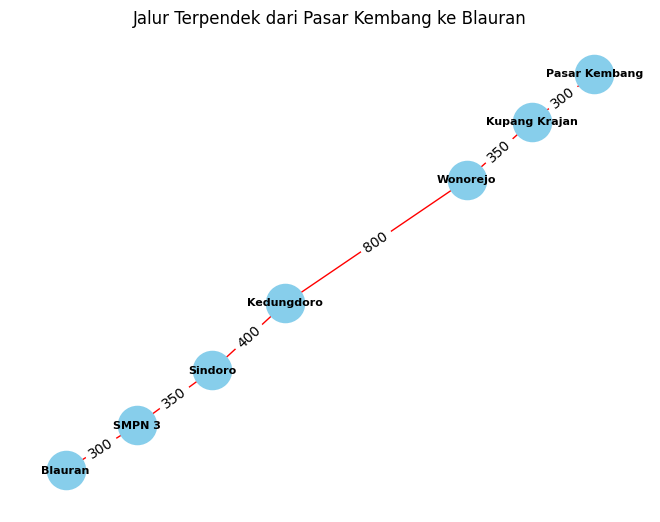

In [12]:
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def bellman_ford(graph, start, end, bus_routes_df):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    # Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for current_node in graph:
            for neighbor, weight in graph[current_node].items():
                potential_route = distances[current_node] + weight
                if potential_route < distances[neighbor]:
                    distances[neighbor] = potential_route
                    previous_nodes[neighbor] = current_node

    # Check for negative-weight cycles
    for current_node in graph:
        for neighbor, weight in graph[current_node].items():
            if distances[current_node] + weight < distances[neighbor]:
                raise ValueError("Graph contains a negative-weight cycle")

    # Reconstruct the path from end to start
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path


def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()

    kode_bus = []
    for column in bus_routes_df.columns:
        # Convert both bus stop name and code to lowercase for case-insensitive comparison
        bus_codes = [code for code in bus_routes_df[column].dropna().str.lower().tolist() if halte_name in code]
        kode_bus.extend(bus_codes)

    return kode_bus


def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None

    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code

    if current_code is not None:
        simplified_codes.append(current_code)

    return simplified_codes

bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Example usage
start_node = 'Pasar Kembang'
end_node = 'Blauran'
distance, shortest_path = bellman_ford(graph, start_node, end_node, bus_routes_df)

print(f"Shortest distance from {start_node} to {end_node}: {distance}")
print(f"Shortest path: {shortest_path}")

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()

    kode_bus = []
    for column in bus_routes_df.columns:
        # Use case-insensitive comparison and handle NaN values
        if bus_routes_df[column].str.lower().eq(halte_name).any():
            kode_bus.append(column)

    return kode_bus

# Print kode bus untuk setiap segmen jalur
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]

    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    simplified_codes = simplify_bus_codes(combined_kode_bus)
    print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")


# Print kode bus yang melewati seluruh jalur terpendek
full_route_bus_codes = []
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]

    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    full_route_bus_codes.extend(combined_kode_bus)

# Simplifikasi kode bus yang melewati seluruh jalur terpendek
simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")



# Plot hanya jalur yang dilewati
G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])

# Gunakan kamada_kawai_layout untuk hasil yang lebih baik
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)

# Tambahkan label pada edge
edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()




GREEDY ALGORITHM

In [13]:
import pandas as pd
import heapq

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def a_star(graph, start, end):
    open_set = []
    heapq.heappush(open_set, (0, start, []))  # Priority queue with initial cost, node, and path
    closed_set = set()

    while open_set:
        current_cost, current_node, current_path = heapq.heappop(open_set)

        if current_node == end:
            return current_cost, current_path + [end]

        if current_node in closed_set:
            continue

        closed_set.add(current_node)

        for neighbor, weight in graph[current_node].items():
            if neighbor not in closed_set:
                heuristic_cost = estimate_cost(graph, neighbor, end)
                total_cost = current_cost + weight + heuristic_cost
                heapq.heappush(open_set, (total_cost, neighbor, current_path + [current_node]))

    raise ValueError("No path found")

def estimate_cost(graph, current, goal):
    # You can customize the heuristic function based on your problem
    # For simplicity, let's use a constant heuristic of 0
    return 0

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan A* untuk mencari jalur dan jarak terpendek
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = a_star(graph, start_node, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")

Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']


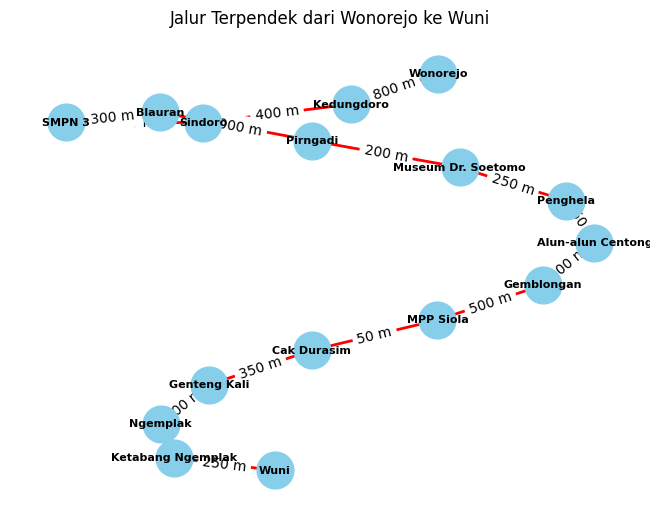

In [14]:
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def a_star(graph, start, end):
    open_set = []
    heapq.heappush(open_set, (0, start, []))  # Priority queue with initial cost, node, and path
    closed_set = set()

    while open_set:
        current_cost, current_node, current_path = heapq.heappop(open_set)

        if current_node == end:
            return current_cost, current_path + [end]

        if current_node in closed_set:
            continue

        closed_set.add(current_node)

        for neighbor, weight in graph[current_node].items():
            if neighbor not in closed_set:
                heuristic_cost = estimate_cost(graph, neighbor, end)
                total_cost = current_cost + weight + heuristic_cost
                heapq.heappush(open_set, (total_cost, neighbor, current_path + [current_node]))

    raise ValueError("No path found")

def estimate_cost(graph, current, goal):
    # You can customize the heuristic function based on your problem
    # For simplicity, let's use a constant heuristic of 0
    return 0

# Membaca data dari file CSV dan menghapus baris yang memiliki nilai kosong
csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)
# Membuat graf dari data frame
graph = create_graph(df)

# Contoh penggunaan A* untuk mencari jalur, jarak terpendek, dan kode bus
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = a_star(graph, start_node, end_node)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")


# Plot hanya jalur yang dilewati dengan menambahkan label pada edge
G = nx.Graph()
for i in range(len(shortest_path)-1):
    distance = graph[shortest_path[i]][shortest_path[i+1]]
    G.add_edge(shortest_path[i], shortest_path[i+1], label=f"{distance} m")

pos = nx.spring_layout(G)

# Ambil label dari atribut 'label'
edge_labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", width=2)

# Tambahkan label pada edge
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


Jarak terpendek dari Wonorejo ke Wuni: 7570
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Kode bus dari Wonorejo ke Kedungdoro: ['FD01']
Kode bus dari Kedungdoro ke Sindoro: ['FD01']
Kode bus dari Sindoro ke SMPN 3: ['FD01']
Kode bus dari SMPN 3 ke Blauran: ['FD07']
Kode bus dari Blauran ke Pirngadi: ['FD07']
Kode bus dari Pirngadi ke Museum Dr. Soetomo: ['FD07']
Kode bus dari Museum Dr. Soetomo ke Penghela: ['FD07']
Kode bus dari Penghela ke Alun-alun Centong: ['FD07']
Kode bus dari Alun-alun Centong ke Gemblongan: ['FD07']
Kode bus dari Gemblongan ke MPP Siola: ['FD07']
Kode bus dari MPP Siola ke Cak Durasim: ['FD07']
Kode bus dari Cak Durasim ke Genteng Kali: ['FD07']
Kode bus dari Genteng Kali ke Ngemplak: ['FD07']
Kode bus dari Ngemplak ke Ketabang Ngemplak: ['FD07']
Kode bus dari Ketaban

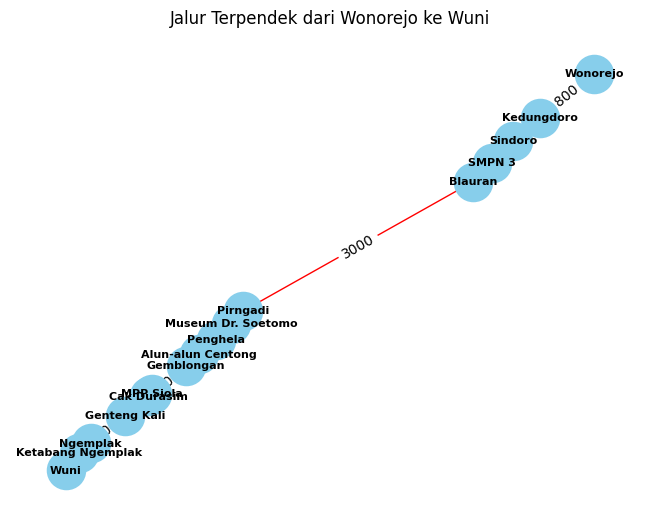

In [15]:
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def a_star(graph, start, end, bus_routes_df):
    open_set = []
    heapq.heappush(open_set, (0, start, [], []))  # Priority queue with initial cost, node, path, and bus route
    closed_set = set()

    while open_set:
        current_cost, current_node, current_path, current_route = heapq.heappop(open_set)

        if current_node == end:
            return current_cost, current_path + [end], current_route

        if current_node in closed_set:
            continue

        closed_set.add(current_node)

        for neighbor, weight in graph[current_node].items():
            if neighbor not in closed_set:
                heuristic_cost = estimate_cost(graph, neighbor, end)
                total_cost = current_cost + weight + heuristic_cost

                # Find bus route information for the current segment
                current_segment_route = find_combined_bus_code(bus_routes_df, current_node, neighbor)
                heapq.heappush(open_set, (total_cost, neighbor, current_path + [current_node], current_route + [current_segment_route]))

    raise ValueError("No path found")
def estimate_cost(graph, current, goal):
    # You can customize the heuristic function based on your problem
    # For simplicity, let's use a constant heuristic of 0
    return 0

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()

    kode_bus = []
    for column in bus_routes_df.columns:
        # Convert both bus stop name and code to lowercase for case-insensitive comparison
        bus_codes = [code for code in bus_routes_df[column].dropna().str.lower().tolist() if halte_name in code]
        kode_bus.extend(bus_codes)

    return kode_bus


def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None

    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code

    if current_code is not None:
        simplified_codes.append(current_code)

    return simplified_codes

bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})

# Example usage
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path, bus_route = a_star(graph, start_node, end_node, bus_routes_df)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
print(f"Jalur terpendek: {shortest_path}")

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()

    kode_bus = []
    for column in bus_routes_df.columns:
        # Use case-insensitive comparison and handle NaN values
        if bus_routes_df[column].str.lower().eq(halte_name).any():
            kode_bus.append(column)

    return kode_bus

# Print kode bus untuk setiap segmen jalur
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]

    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    simplified_codes = simplify_bus_codes(combined_kode_bus)
    print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")


# Print kode bus yang melewati seluruh jalur terpendek
full_route_bus_codes = []
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]

    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    full_route_bus_codes.extend(combined_kode_bus)

# Simplifikasi kode bus yang melewati seluruh jalur terpendek
simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")



# Plot hanya jalur yang dilewati
G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])

# Gunakan kamada_kawai_layout untuk hasil yang lebih baik
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)

# Tambahkan label pada edge
edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()




In [16]:
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

def a_star(graph, start, end, bus_routes_df):
    open_set = []
    heapq.heappush(open_set, (0, start, [], []))  # Priority queue with initial cost, node, path, and bus route
    closed_set = set()

    while open_set:
        current_cost, current_node, current_path, current_route = heapq.heappop(open_set)

        if current_node == end:
            return current_cost, current_path + [end], current_route

        if current_node in closed_set:
            continue

        closed_set.add(current_node)

        for neighbor, weight in graph[current_node].items():
            if neighbor not in closed_set:
                heuristic_cost = estimate_cost(graph, neighbor, end)
                total_cost = current_cost + weight + heuristic_cost

                # Find bus route information for the current segment
                current_segment_route = find_combined_bus_code(bus_routes_df, current_node, neighbor)
                heapq.heappush(open_set, (total_cost, neighbor, current_path + [current_node], current_route + [current_segment_route]))

    raise ValueError("No path found")

def estimate_cost(graph, current, goal):
    # You can customize the heuristic function based on your problem
    # For simplicity, let's use a constant heuristic of 0
    return 0

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()

    kode_bus = []
    for column in bus_routes_df.columns:
        # Convert both bus stop name and code to lowercase for case-insensitive comparison
        bus_codes = [code for code in bus_routes_df[column].dropna().str.lower().tolist() if halte_name in code]
        kode_bus.extend(bus_codes)

    return kode_bus


def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None

    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code

    if current_code is not None:
        simplified_codes.append(current_code)

    return simplified_codes
def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()

    kode_bus = []
    for column in bus_routes_df.columns:
        # Use case-insensitive comparison and handle NaN values
        if bus_routes_df[column].str.lower().eq(halte_name).any():
            kode_bus.append(column)

    return kode_bus

bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})

# Example usage
start_node = 'kertajaya'
end_node = 'Progo'

try:
    distance, shortest_path, bus_route = a_star(graph, start_node, end_node, bus_routes_df)
    print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}")
    print(f"Jalur terpendek: {shortest_path}")

    # Print kode bus untuk setiap segmen jalur
    for i in range(len(shortest_path) - 1):
        current_node = shortest_path[i]
        next_node = shortest_path[i + 1]

        combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
        simplified_codes = simplify_bus_codes(combined_kode_bus)
        print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")

    # Print kode bus yang melewati seluruh jalur terpendek
    full_route_bus_codes = []
    for i in range(len(shortest_path) - 1):
        current_node = shortest_path[i]
        next_node = shortest_path[i + 1]

        combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
        full_route_bus_codes.extend(combined_kode_bus)

    # Simplifikasi kode bus yang melewati seluruh jalur terpendek
    simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
    print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")

    # Plot hanya jalur yang dilewati
    G = nx.Graph()
    for i in range(len(shortest_path)-1):
        G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])

    # Gunakan kamada_kawai_layout untuk hasil yang lebih baik
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)

    # Tambahkan label pada edge
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
    plt.show()

except ValueError as e:
    print(f"Tidak dapat menemukan jalur: {e}")


Tidak dapat menemukan jalur: No path found
